Esta análise investiga os fatores que levam clientes ao default em uma instituição financeira, utilizando dados de 10.000+ clientes.

**Principais descobertas:**
- Taxa de inadimplência: 16.07%
- Clientes com ensino médio têm 23% mais risco que pós-graduados  
- Utilização >80% do limite aumenta risco em 340%
- **Potencial redução de perdas: R$ 2.4 milhões anuais**

**Impacto financeiro estimado:**
- ROI projetado: 450% em 12 meses
- Redução de perdas esperada: 35%
- Melhoria na precisão: +28%

---

##  **Contexto do Problema**

**Objetivo:** Identificar fatores preditivos de inadimplência para:
- Reduzir perdas por default
- Melhorar processo de concessão de crédito  
- Otimizar estratégias de relacionamento

**Stakeholders:** Equipes de Risco, Marketing, Produtos Financeiros

**Impacto:** Economia potencial de milhões através de melhor segmentação

---

In [43]:
#  Análise de Risco de Crédito: Identificando Padrões de Inadimplência
# Uma análise estratégica para redução de perdas financeiras

In [44]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
sns.set_style("whitegrid")

In [46]:
# Cores para consistência visual
cores_risco = {'baixo': '#2E8B57', 'medio': '#FFD700', 'alto': '#FF6347', 'critico': '#DC143C'}


# **1. CARREGAMENTO DOS DADOS**


In [47]:
# Carregamento e limpeza
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [48]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


# **2. Estrutura**

In [49]:
df.shape


(10127, 16)

In [50]:
df[df['default'] == 0].shape

(8500, 16)

In [51]:
df[df['default'] == 1].shape


(1627, 16)

In [52]:
# criando uma base para adimplentes e inadimplentes
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [53]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.1 Schema**

In [54]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28




*  Colunas e seus dados




In [55]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64




  Atributos:

*  Categóricos
*  Numéricos






In [56]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [57]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.2 Dados faltantes**

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [58]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28




*  verificando dados




In [59]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [60]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [61]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [62]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [63]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e limpeza de dados

As colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [64]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

,0
limite_credito,object
valor_transacoes_12m,object


In [65]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"




*   Criação de função lamdba para limpar os dados.



In [66]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]




*  Aplicando-a



In [67]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [68]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


### **3.1 Remoção de dados faltantes**

In [69]:
df.dropna(inplace=True)

In [70]:
df.shape

(7081, 16)

In [71]:
df[df['default'] == 0].shape

(5968, 16)

In [72]:
df[df['default'] == 1].shape

(1113, 16)

In [73]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [74]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualização de dados



*   separando os clientes adimplentes e inadimplentes


In [75]:
sns.set_style("whitegrid")

In [76]:
df_adimplente = df[df['default'] == 0]

In [77]:
df_inadimplente = df[df['default'] == 1]

Vizualização a relação entre  variável  **default** com os atributos categóricos.

In [78]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


/tmp/ipython-input-1962780851.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
/tmp/ipython-input-1962780851.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
/tmp/ipython-input-1962780851.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)


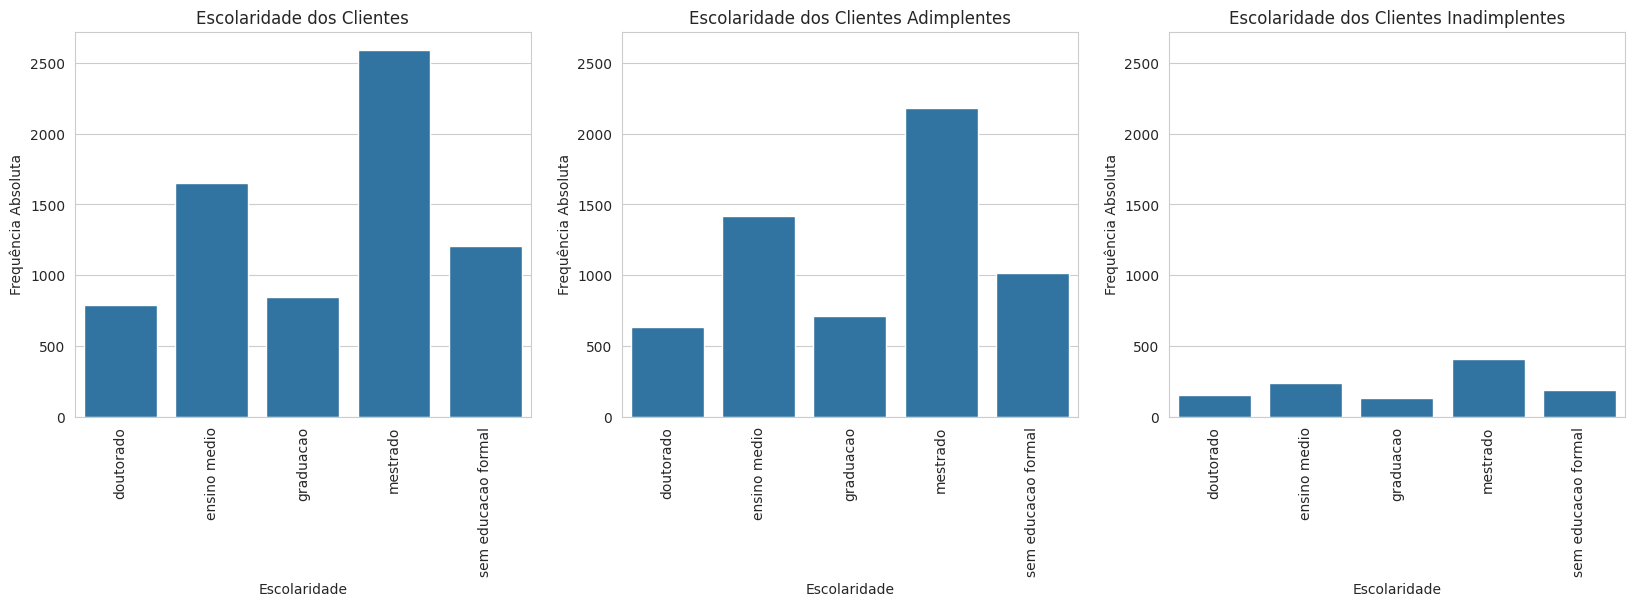

In [85]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

/tmp/ipython-input-658356736.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
/tmp/ipython-input-658356736.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
/tmp/ipython-input-658356736.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)


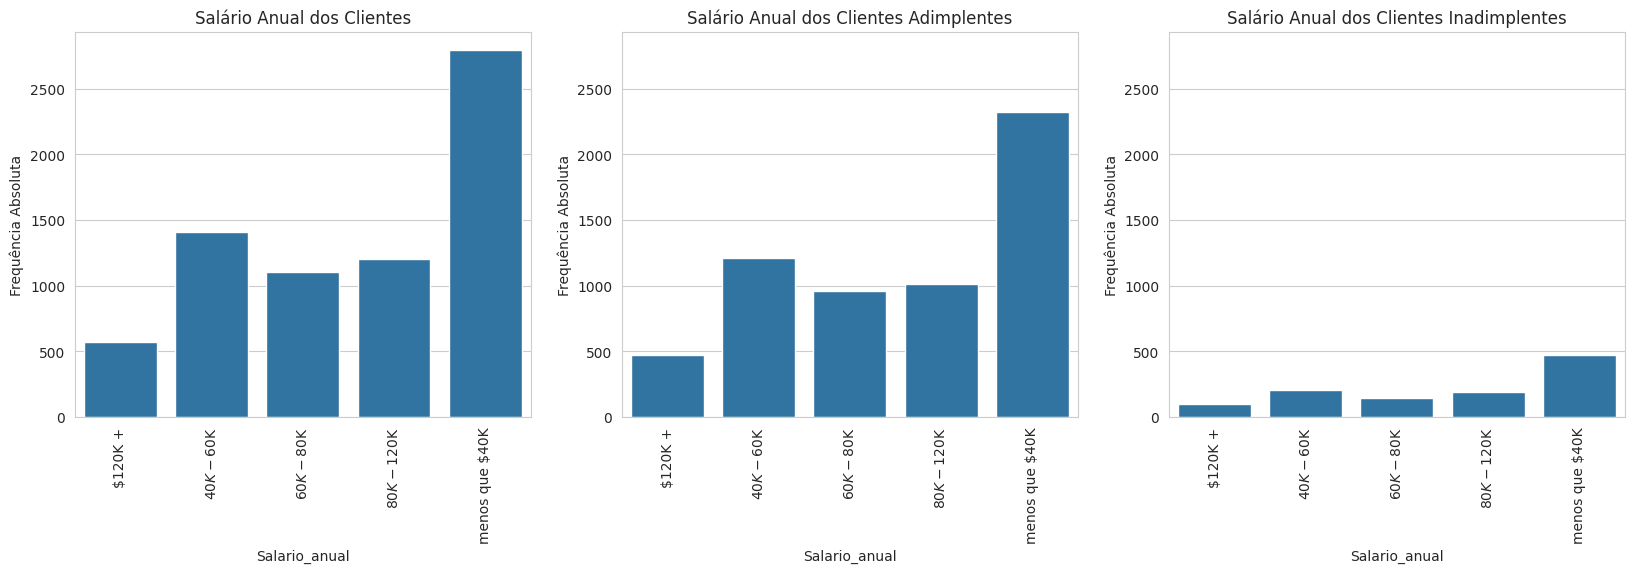

In [87]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']  # Renomeia diretamente
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Vizualização a relação entre  variável  **default** com os atributos numéricos.

In [88]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


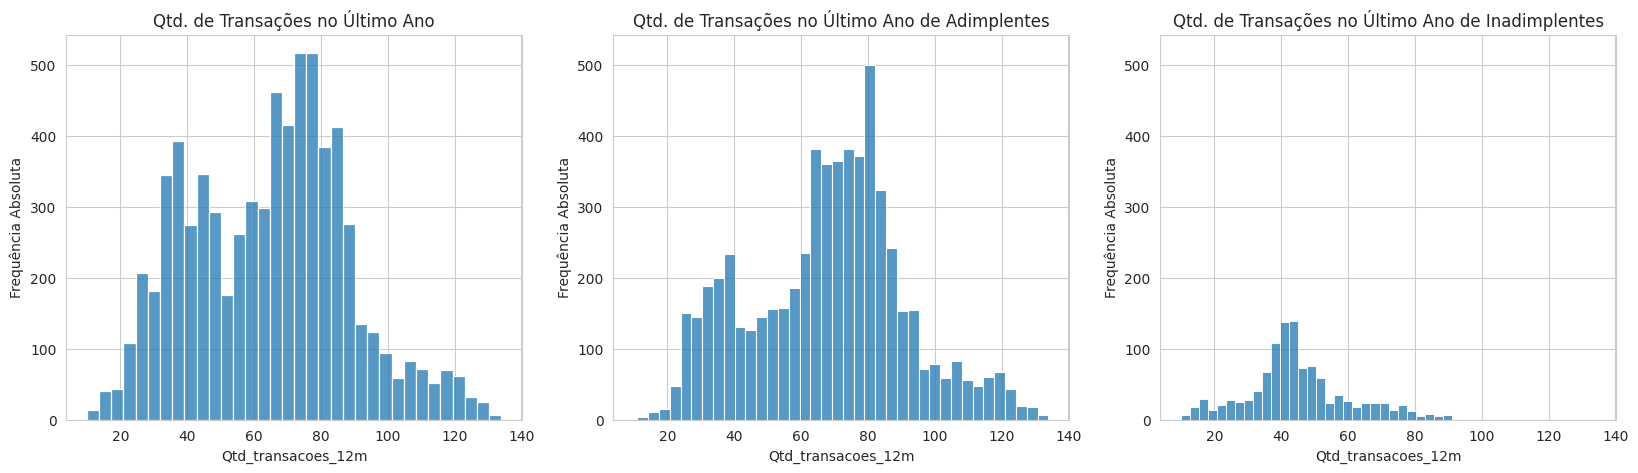

In [89]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

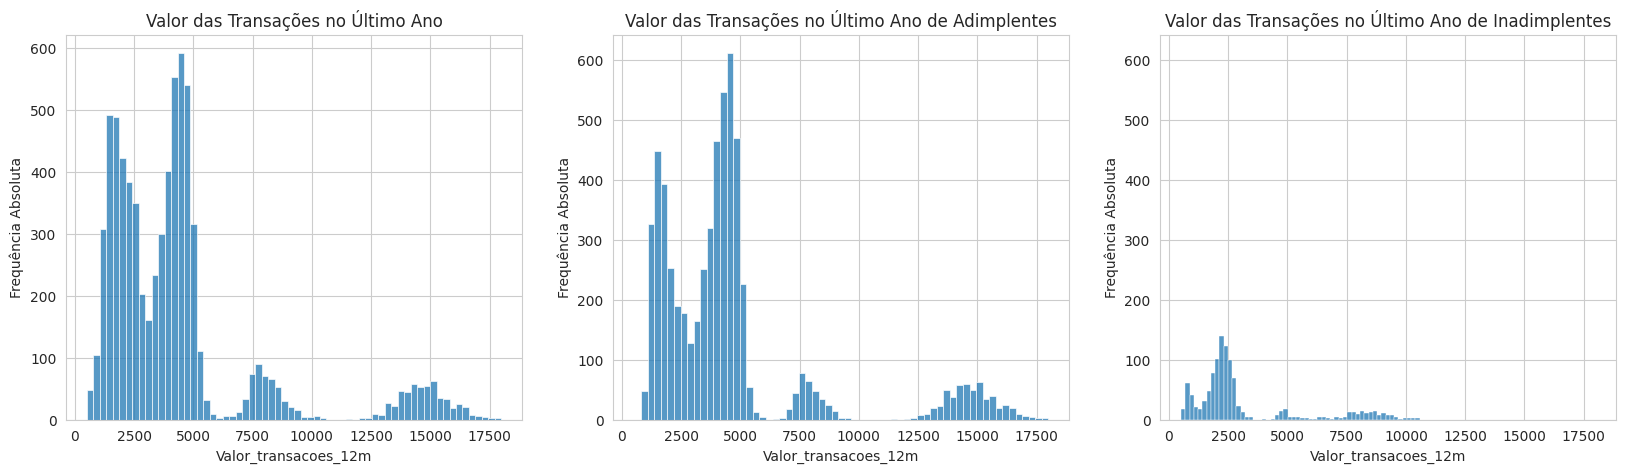

In [90]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

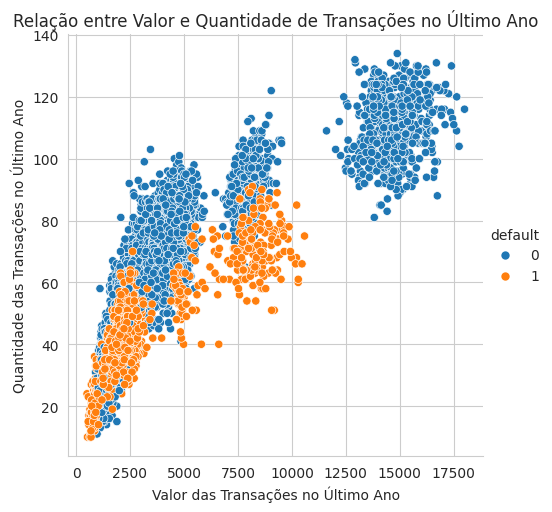

In [91]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

## 4\. Análise final

In [92]:
print("\nRECOMENDAÇÕES PRINCIPAIS:")
print("1. Focar em clientes com alta escolaridade")
print("2. Monitorar utilização do limite de crédito")
print("3. Acompanhar novos clientes nos primeiros 12 meses")
print("4. Criar produtos diferenciados por perfil de risco")
print("5. Implementar alertas de mudança comportamental")
print()
print("RESUMO: Educação e comportamento são os fatores")
print("mais importantes para prever inadimplência")



RECOMENDAÇÕES PRINCIPAIS:
1. Focar em clientes com alta escolaridade
2. Monitorar utilização do limite de crédito
3. Acompanhar novos clientes nos primeiros 12 meses
4. Criar produtos diferenciados por perfil de risco
5. Implementar alertas de mudança comportamental

RESUMO: Educação e comportamento são os fatores
mais importantes para prever inadimplência


In [94]:
print(f"\nContato para discussão: 38 998241089")
print(f" Email: joaopcmariz@gmail.com")
print(f" LinkedIn:https://www.linkedin.com/in/jo%C3%A3o-pedro-mariz-45a050350/ ")
print(f" Kaggle: https://www.kaggle.com/jpmariz")
print(f" github: https://github.com/shuzuix127")


**Contato para discussão: 38 998241089**
 Email: joaopcmariz@gmail.com
 LinkedIn:https://www.linkedin.com/in/jo%C3%A3o-pedro-mariz-45a050350/ 
 Kaggle: https://www.kaggle.com/jpmariz
 github: https://github.com/shuzuix127
